<div style="background-color:white; text-align:center; padding:20px;">
    <h2 style="color:black; font-family: Verdana, sans-serif;"><strong>Creating an LLM to find sustainable solutions</strong></h2>
    <p style="font-size: 14px; color: black; font-family: Verdana, sans-serif;"> 
        <table style="margin: auto; border-collapse: collapse;">
            <tr>
                <th style="border: 0;">Names</th>
                <th style="border: 0;">GitHub Username</th>
            </tr>
            <tr>
                <td style="border: 0;">Vince Ammerlaan</td>
                <td style="border: 0;">Vince16270</td>
            </tr>
            <tr>
                <td style="border: 0;">Tommi Lander</td>
                <td style="border: 0;">tommi7</td>
            </tr>
            <tr>
                <td style="border: 0;">Nima Ghafar</td>
                <td style="border: 0;">NimaGhafar</td>
            </tr>
            <tr>
                <td style="border: 0;">Jort Akershoek</td>
                <td style="border: 0;">JortAkershoek</td>
            </tr>
        </table>
    </p>
</div>

<div style="display: flex; justify-content: center; align-items: center; margin-top:20px;">
    <img src="https://static.vecteezy.com/system/resources/previews/017/306/579/original/esg-sustainability-concept-illustration-vector.jpg" alt="genres" style="width: 600px; height: auto;">
</div>

- Client: Mathis Mourey 
- Instructors: Mirabai Vosteen and Beata Skuczynska
- Date: ..-..-2025

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Table of contents </strong></h2>
</div>
<ul style="padding: 0; list-style: none;">
    <li style="text-align: center;"><a href="#1.0">Chapter 1: The Project</a></li>
    <li style="text-align: center;"><a href="#1.0">Chapter 2: Loading Packages, Self-defined functions and the Data</a></li>
    <li style="text-align: center;"><a href="#2.0">Chapter 3: Exploratory Data Analysis</a></li>
    <li style="text-align: center;"><a href="#3.0">Chapter 4: Data Preprocessing</a></li>
    <li style="text-align: center;"><a href="#6.0">Chapter 5: </a></li>
    <li style="text-align: center;"><a href="#5.0">Chapter 6: </a></li>
    <li style="text-align: center;"><a href="#7.0">Chapter 7: </a></li>
    <li style="text-align: center;"><a href="#7.0">Chapter 8: Results and Conclusions</a></li>
    <li style="text-align: center;"><a href="#8.0">Chapter 9: Sources</a></li>
</ul>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 1: The Project </strong></h2>

</ul>

In this project, we focus on improving the accessibility of policy information related to the energy transition. Governments across Europe and the Netherlands publish numerous policy documents, regulations, and reports to support the shift toward renewable energy sources. These documents are often technical, extensive, and written in academic or legal language, making it difficult for citizens to understand their content. As a result, they miss out on important information about subsidies, regulations, or their own role in the energy transition.

To address this problem, we are developing a chatbot powered by a Large Language Model (LLM). This chatbot is capable of automatically analyzing, summarizing, and translating government documents into plain and understandable language. Users can ask questions through a simple interface, and the chatbot provides clear answers based on factual information.

Our approach consists of collecting policy documents in PDF format, preprocessing the texts using NLP techniques such as tokenization and filtering, and leveraging a powerful pretrained LLM for text processing. Instead of training a model from scratch, we utilize a pretrained model and Retrieval-Augmented Generation (RAG) to generate relevant answers. The generated responses are evaluated based on their clarity, relevance, and reliability.

With this tool, we aim to contribute to a better-informed society in which citizens have easy access to simplified yet essential information. In doing so, we not only increase public engagement in the energy transition, but also strengthen support for sustainable policy.

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 2: Loading Packages, Self-defined functions and the Data</strong></h2>

</ul>

**Packages**

- This section of the notebook covers the necessary Python packages required for our deep learning models. Below is a list of the key packages used

In [1]:
import os
import pandas as pd
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

**Self defined functions**

- This section contains our self defined functions that are essential for our project. These functions are written to streamline repetitive tasks and enhance code readability.

In [2]:
def extract_text_from_pdf(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        return text
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return None

**Loading the text from the PDF files**

- Here we load the text from the different PDF files into text format.

In [3]:
pdf_dir = os.path.join("..", "Training_set_text", "European_policies")

data = []
for file_name in os.listdir(pdf_dir):
    if file_name.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, file_name)
        text = extract_text_from_pdf(file_path)
        if text:
            data.append({"file_name": file_name, "text": text})

df = pd.DataFrame(data)

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 3: Exploratory Data Analysis </strong></h2>
</div>

**Basic information**

- In this section, we

In [4]:
print("Number of PDF files processed:", len(df))
print("Sample data:")
print(df.head())

Number of PDF files processed: 9
Sample data:
                                           file_name  \
0                          OJ_L_202302413_EN_TXT.pdf   
1  cellar_fc930f14-d7ae-11ec-a95f-01aa75ed71a1.00...   
2                        CELEX_32019L0944_EN_TXT.pdf   
3                          OJ_L_202401275_EN_TXT.pdf   
4                        CELEX_32023L1791_EN_TXT.pdf   

                                                text  
0  ELI: http://data.europa.eu/eli/dir/2023/2413/o...  
1   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...  
2  DIRECTIVES \nDIRECTIVE (EU) 2019/944 OF THE EU...  
3  DIRECTIVE (EU) 2024/1275 OF THE EUR OPEAN PARL...  
4  I\n(Legislative acts)\nDIRECTIVES\nDIRECTIVE (...  


**Text lengths**

- In this section, we

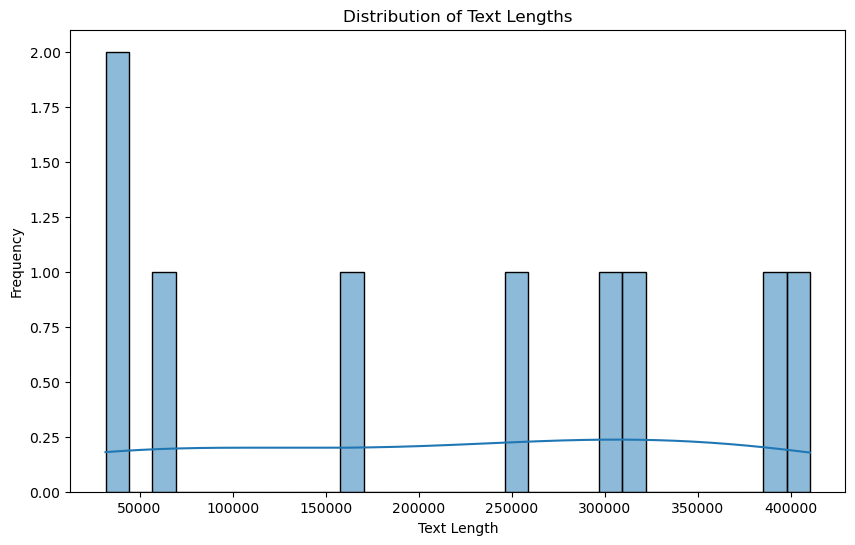

In [5]:
# Add column for text length
df['text_length'] = df['text'].apply(len)

# Plot distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

**Word cloud**

- In this section, we

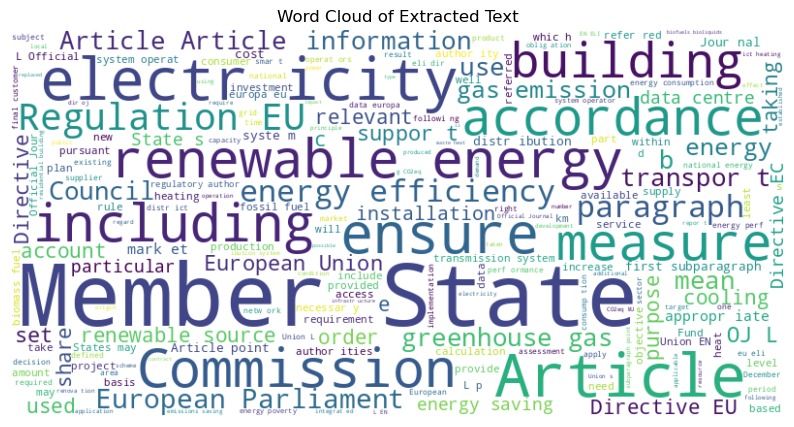

In [6]:
# Generate a word cloud for the combined text
all_text = " ".join(df['text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Extracted Text")
plt.show()

**Stop words**

- In this section, we

In [7]:
# Download de stopwoorden als dit nog niet is gedaan
nltk.download('stopwords')

# Stopwoorden ophalen
stop_words = set(stopwords.words('english')) 

# Functie om het aantal stopwoorden in een tekst te tellen
def count_stopwords(text):
    words = text.split()
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    return stopword_count

# word_count toevoegen
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Voeg een nieuwe kolom toe aan de DataFrame met het aantal stopwoorden per bestand
df['stopword_count'] = df['text'].apply(count_stopwords)

# word_count toevoegen
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# stopwoord percentage toevoegen
df['stopword_percentage'] = df['stopword_count'] / df['word_count'] * 100

display(df)

[nltk_data] Downloading package stopwords to /Users/vince/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


file_name  \
0                          OJ_L_202302413_EN_TXT.pdf   
1  cellar_fc930f14-d7ae-11ec-a95f-01aa75ed71a1.00...   
2                        CELEX_32019L0944_EN_TXT.pdf   
3                          OJ_L_202401275_EN_TXT.pdf   
4                        CELEX_32023L1791_EN_TXT.pdf   
5                          OJ_L_202401364_EN_TXT.pdf   
6                        CELEX_32023R0955_EN_TXT.pdf   
7  cellar_71767319-9f0a-11ec-83e1-01aa75ed71a1.00...   
8                        CELEX_32018L2001_EN_TXT.pdf   

                                                text  text_length  word_count  \
0  ELI: http://data.europa.eu/eli/dir/2023/2413/o...       317288       51603   
1   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...        61198        9221   
2  DIRECTIVES \nDIRECTIVE (EU) 2019/944 OF THE EU...       297304       48925   
3  DIRECTIVE (EU) 2024/1275 OF THE EUR OPEAN PARL...       249066       39342   
4  I\n(Legislative acts)\nDIRECTIVES\nDIRECTIVE (...       388256       58299   
5  COMMISSION DELEGATED REGUL ATION (EU) 2024/136...        40383        6181   
6  I\n(Legislative acts)\nREGUL ATIONS\nREGUL ATI...       168580       27183   
7   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...        31713        4902   
8  DIRECTIVES \nDIRECTIVE (EU) 2018/2001 OF THE E...       410355       69423   

   stopword_count  stopword_percentage  
0           18475            35.802182  
1            3253            35.278169  
2           17671            36.118549  
3           13103            33.305373  
4           20570            35.283624  
5            2135            34.541336  
6           10081            37.085679  
7            1693            34.536924  
8           22054            31.767570

Text(0, 0.5, 'Stopwoord percentage')

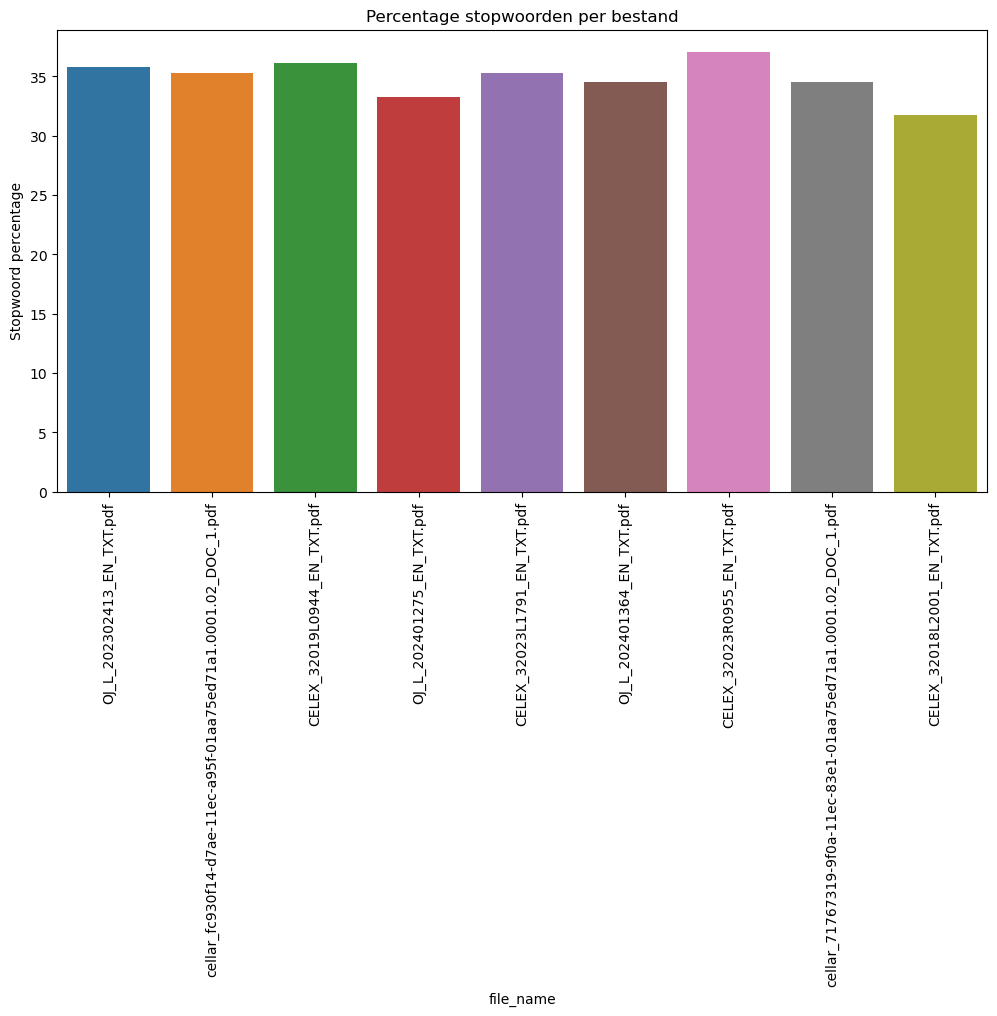

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='file_name', y='stopword_percentage', data=df)
plt.xticks(rotation=90)
plt.title('Percentage stopwoorden per bestand')
plt.ylabel('Stopwoord percentage')

**Stop words for each PDF file**

- In this section, we

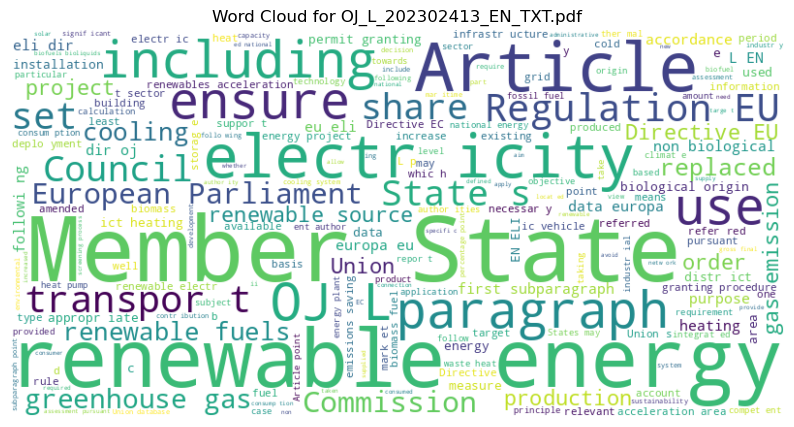

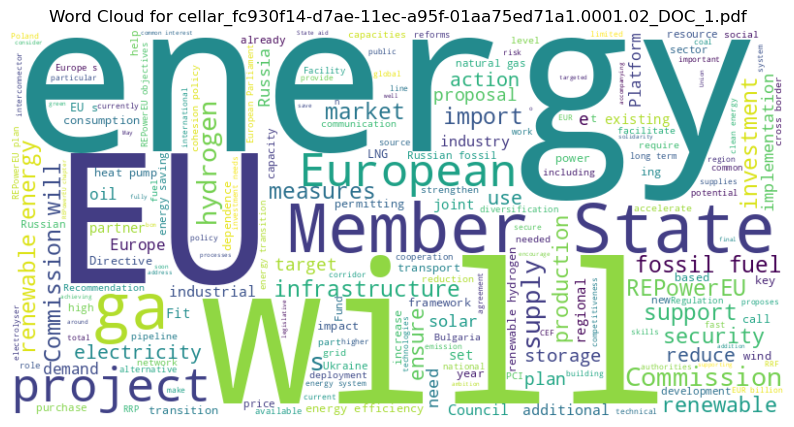

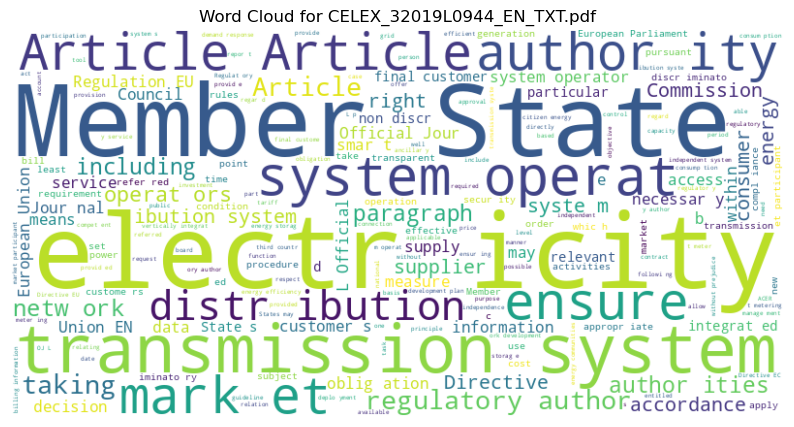

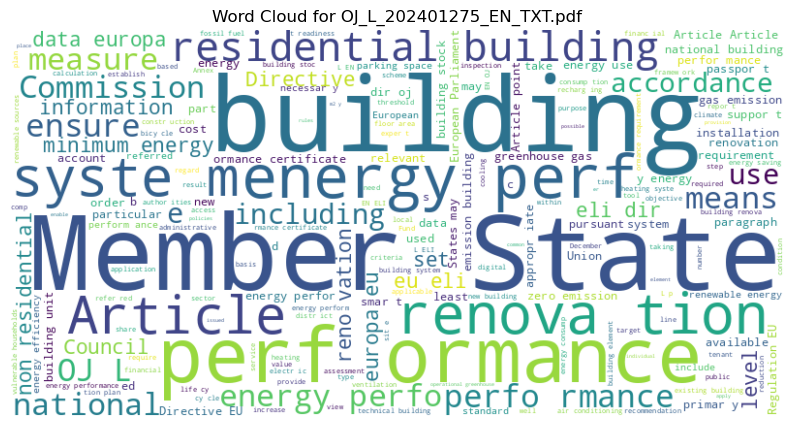

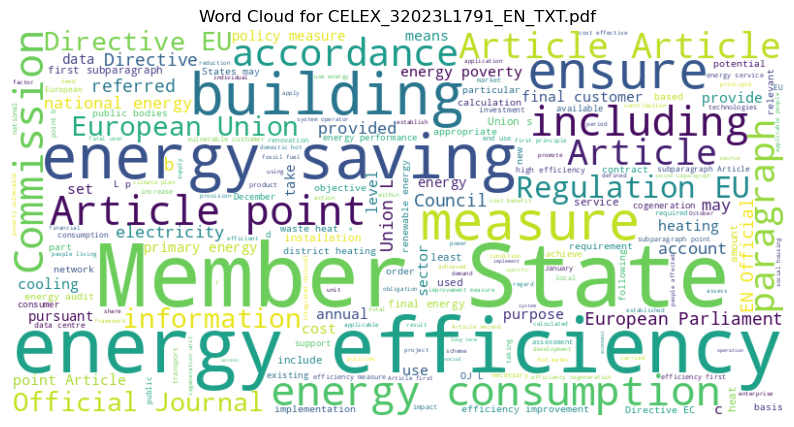

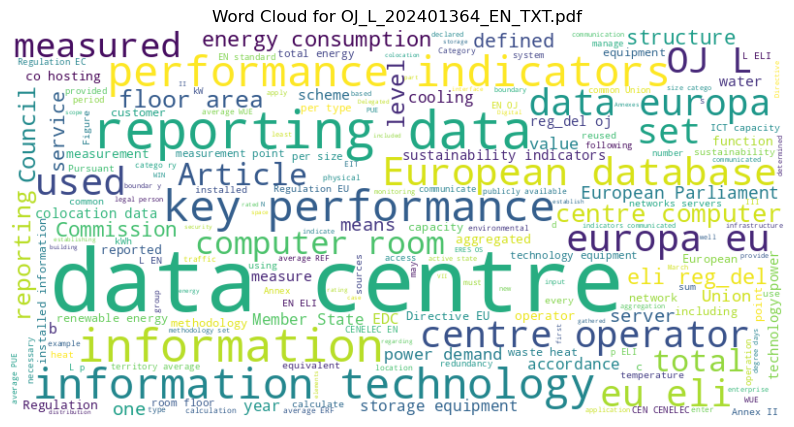

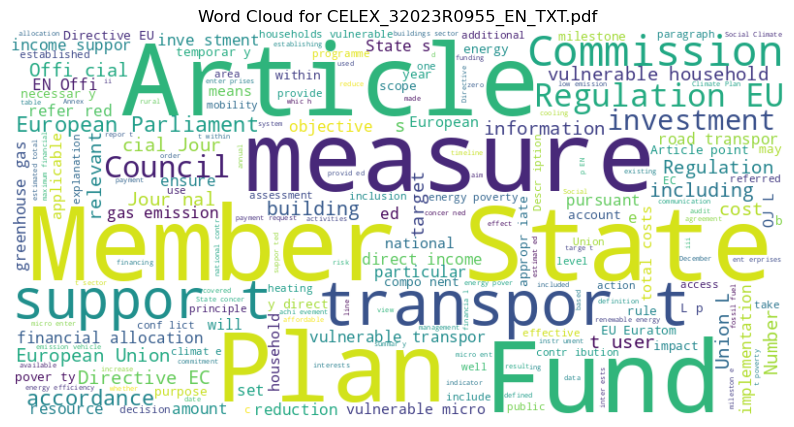

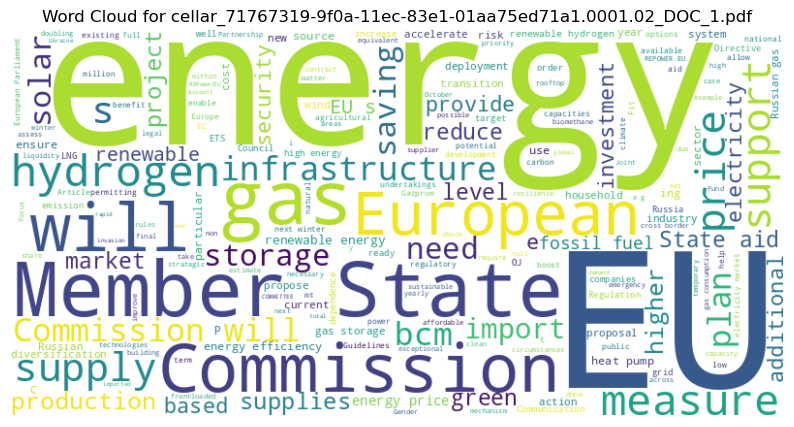

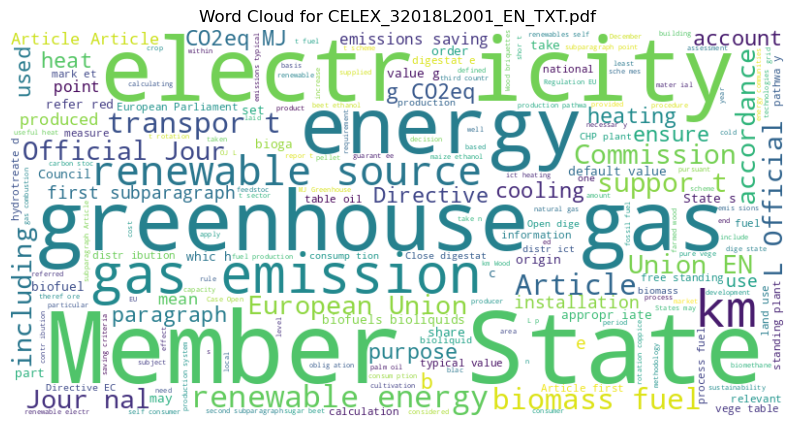

In [9]:
for index, row in df.iterrows():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(row['text'])
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {row['file_name']}")
    plt.show()

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 4: Data Preprocessing </strong></h2>
</div>

In [10]:
# Save the processed data for LLM input
output_path = "processed_data.csv"
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to processed_data.csv


In [10]:
import re
def clean_text(text):
    # Remove extra whitespace, newlines, and special characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
    text = re.sub(r'[^\w\s.,!?]', '', text)  # Remove special characters except punctuation
    text = text.strip()  # Remove leading/trailing whitespace
    return text

def chunk_text(text, max_tokens, tokenizer):
    tokens = tokenizer.tokenize(text)
    chunks = []
    for i in range(0, len(tokens), max_tokens):
        chunk = tokens[i:i + max_tokens]
        chunks.append(tokenizer.convert_tokens_to_string(chunk))
    return chunks

In [9]:
from transformers import AutoTokenizer
tokenizer_name = "gpt2"  # Replace with your model's tokenizer
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
max_tokens = 512

c:\Users\akers\anaconda3\envs\tf\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

c:\Users\akers\anaconda3\envs\tf\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\akers\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [12]:
data =[]
for i, row in df.iterrows():
    text = row['text']
    text = clean_text(text)
    chunks = chunk_text(text, max_tokens, tokenizer)
    for i, chunk in enumerate(chunks):
        data.append({'file_name': row['file_name'], 'chunk_id': i, 'text': chunk})

# Create a DataFrame for the processed data
df_processed = pd.DataFrame(data)
output_path = "processed_data_chunks.json"
df_processed.to_json(output_path, orient='records', lines=True)
print(f"Processed data saved to {output_path}")

Processed data saved to processed_data_chunks.json
